In [1]:
#Importing libraries and data
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Auto Sales data.csv')
data.head(3)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium


In [2]:
data.shape #Shape of the dataset

(2747, 20)

In [3]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE']) #Changing the date formate
data['MONTH'] = data['ORDERDATE'].dt.strftime('%m') #Creating new column for month number
data.head(1)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,MONTH
0,10107,30,95.7,2,2871.0,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,02


### Which Country has the highest Orders?

In [10]:
data.groupby('COUNTRY').sum()['QUANTITYORDERED']

COUNTRY
Australia       6246
Austria         1974
Belgium         1074
Canada          2293
Denmark         2197
Finland         3192
France         11090
Germany         2148
Ireland          490
Italy           3773
Japan           1842
Norway          2842
Philippines      961
Singapore       2760
Spain          12429
Sweden          2006
Switzerland     1078
UK              5013
USA            33020
Name: QUANTITYORDERED, dtype: int64

In [5]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'MONTH'],
      dtype='object')

In [ ]:
data = data.drop(['ORDERNUMBER','ORDERLINENUMBER','PRODUCTCODE','POSTALCODE','ADDRESSLINE1','CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis = 1) #Deleting unnecessary columns 

In [15]:
data.describe()

,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,35.103021,101.098952,3553.047583,1757.085912,100.691664
std,9.762135,42.042549,1838.953901,819.280576,40.114802
min,6.000000,26.880000,482.130000,42.000000,33.000000
25%,27.000000,68.745000,2204.350000,1077.000000,68.000000
50%,35.000000,95.550000,3184.800000,1761.000000,99.000000
75%,43.000000,127.100000,4503.095000,2436.500000,124.000000
max,97.000000,252.870000,14082.800000,3562.000000,214.000000


In [16]:
data.head(5)

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,PHONE,CITY,COUNTRY,DEALSIZE,MONTH
0,30,95.70,2871.00,2018-02-24,828,Shipped,Motorcycles,95,Land of Toys Inc.,2125557818,NYC,USA,Small,02
1,34,81.35,2765.90,2018-07-05,757,Shipped,Motorcycles,95,Reims Collectables,26.47.1555,Reims,France,Small,07
2,41,94.74,3884.34,2018-01-07,703,Shipped,Motorcycles,95,Lyon Souveniers,+33 1 46 62 7555,Paris,France,Medium,01
3,45,83.26,3746.70,2018-08-25,649,Shipped,Motorcycles,95,Toys4GrownUps.com,6265557265,Pasadena,USA,Medium,08
4,36,96.66,3479.76,2018-10-28,586,Shipped,Motorcycles,95,Technics Stores Inc.,6505556809,Burlingame,USA,Medium,10


### Which city in Australia has highest sales?

In [22]:
pd.DataFrame(data.groupby(['COUNTRY', 'CITY']).sum()['SALES'])[:10]

SALES
COUNTRY   CITY                     
Australia Chatswood       151570.98
          Glen Waverly     64591.46
          Melbourne       200995.41
          North Sydney    153996.13
          South Brisbane   59469.12
Austria   Graz             52263.90
          Salzburg        149798.63
Belgium   Bruxelles        74972.52
          Charleroi        33440.10
Canada    Montreal         74204.79

In [23]:
data.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

### Which product line has highest sales?

In [38]:
prodlin_high_sales = data.groupby('PRODUCTLINE').sum()['SALES']
prodlin_high_sales

PRODUCTLINE
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: SALES, dtype: float64

C:\Users\manis\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


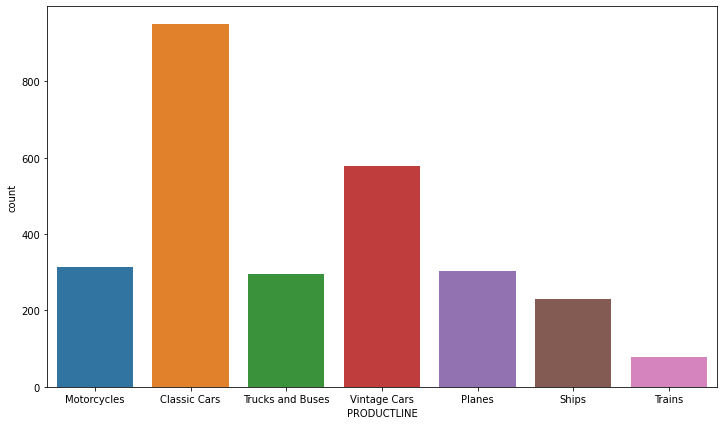

In [46]:
import seaborn as sb
plt.figure(figsize = (12, 7))
sb.countplot(data.PRODUCTLINE)
plt.show()

### Which product has highest order quantity 

In [34]:
data.groupby('PRODUCTLINE').sum()['QUANTITYORDERED']

PRODUCTLINE
Classic Cars        33373
Motorcycles         11080
Planes              10636
Ships                7989
Trains               2712
Trucks and Buses    10579
Vintage Cars        20059
Name: QUANTITYORDERED, dtype: int64

### Which month has highest sales?

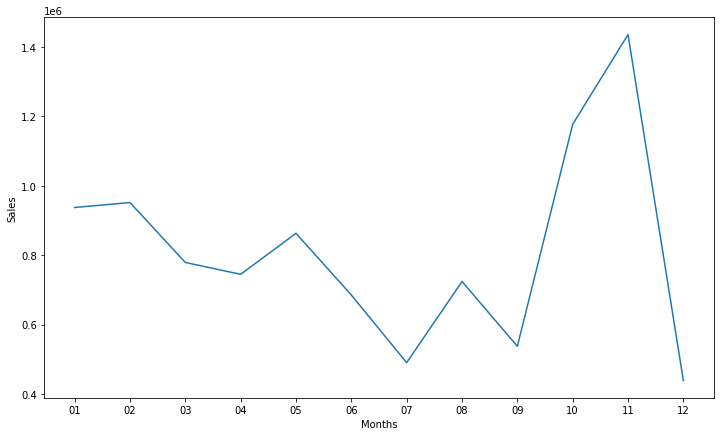

In [54]:
sales_by_month = data.groupby('MONTH').sum()['SALES'].reset_index()
plt.figure(figsize = (12, 7))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.plot(sales_by_month['MONTH'], sales_by_month['SALES'])
plt.show()


In [56]:
data.STATUS.unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

### Which products are in On Hold Status?

In [62]:
data.groupby(['PRODUCTLINE', 'STATUS']).sum()

QUANTITYORDERED  PRICEEACH       SALES  \
PRODUCTLINE      STATUS                                               
Classic Cars     Cancelled               493    1906.50    59242.81   
                 Disputed                174     447.71    26012.87   
                 In Process              564    1458.87    57760.66   
                 On Hold                 512    1232.18    49039.65   
                 Resolved                294     734.70    25799.34   
                 Shipped               31336  103540.74  3625013.21   
Motorcycles      Disputed                259     736.11    31821.90   
                 On Hold                  49     101.89     4992.61   
                 Shipped               10772   30389.11  1066697.68   
Planes           Cancelled               415     984.57    35432.71   
                 Disputed                 63     125.43     3843.84   
                 On Hold                 418     766.13    34727.53   
                 Resolved                442     933.85    34532.92   
                 Shipped                9298   24707.44   860786.42   
Ships            Cancelled               628    1621.17    56665.65   
                 Disputed                 32      95.95     3070.40   
                 On Hold                 271     734.22    23664.61   
                 Resolved                404    1196.91    39863.71   
                 Shipped                6654   16630.68   576774.85   
Trains           Cancelled                42     121.01     5082.42   
                 On Hold                  48     121.01     5808.48   
                 Shipped                2622    6234.35   215352.57   
Trucks and Buses In Process              394    1110.00    43026.41   
                 On Hold                 171     457.44    20193.29   
                 Resolved                203     509.23    20472.75   
                 Shipped                9811   28705.10  1027866.74   
Vintage Cars     Cancelled               460    1100.25    38063.89   
                 Disputed                 69     191.45     7463.85   
                 In Process              532    1283.27    43942.89   
                 On Hold                 410     833.63    40553.02   
                 Resolved                317     879.51    30049.56   
                 Shipped               18271   47828.41  1646602.47   

                             DAYS_SINCE_LASTORDER    MSRP  
PRODUCTLINE      STATUS                                    
Classic Cars     Cancelled                  18068    1941  
                 Disputed                    2358     424  
                 In Process                 18849    1479  
                 On Hold                    14699    1301  
                 Resolved                   12314     744  
                 Shipped                  1298366  107750  
Motorcycles      Disputed                    2790     728  
                 On Hold                     2185      99  
                 Shipped                   491785   29417  
Planes           Cancelled                  28327    1069  
                 Disputed                    4476     117  
                 On Hold                    19636     795  
                 Resolved                   21677    1101  
                 Shipped                   646197   23964  
Ships            Cancelled                  47535    1550  
                 Disputed                    2508      90  
                 On Hold                    18148     685  
                 Resolved                   29696     998  
                 Shipped                   512926   16447  
Trains           Cancelled                   1426     100  
                 On Hold                     1073     100  
                 Shipped                   171661    5420  
Trucks and Buses In Process                 14232    1129  
                 On Hold                     5105     430  
                 Resolved                    9120     

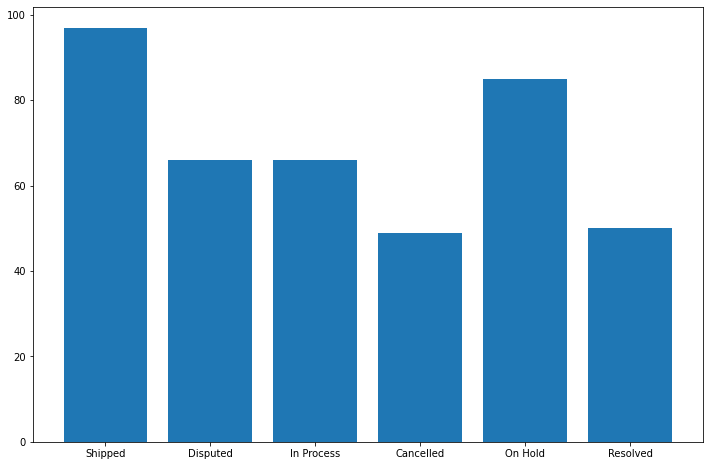

In [64]:
plt.figure(figsize = (12, 8))
plt.bar(data.STATUS, data.QUANTITYORDERED)
plt.show()

In [65]:
data.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,CUSTOMERNAME,PHONE,CITY,COUNTRY,DEALSIZE,MONTH
0,30,95.70,2871.00,2018-02-24,828,Shipped,Motorcycles,95,Land of Toys Inc.,2125557818,NYC,USA,Small,02
1,34,81.35,2765.90,2018-07-05,757,Shipped,Motorcycles,95,Reims Collectables,26.47.1555,Reims,France,Small,07
2,41,94.74,3884.34,2018-01-07,703,Shipped,Motorcycles,95,Lyon Souveniers,+33 1 46 62 7555,Paris,France,Medium,01
3,45,83.26,3746.70,2018-08-25,649,Shipped,Motorcycles,95,Toys4GrownUps.com,6265557265,Pasadena,USA,Medium,08
4,36,96.66,3479.76,2018-10-28,586,Shipped,Motorcycles,95,Technics Stores Inc.,6505556809,Burlingame,USA,Medium,10


### Deal size based on sales

<BarContainer object of 3 artists>

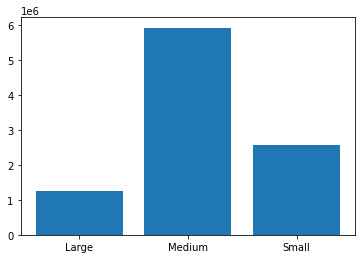

In [78]:
dealSizeOnSales = data.groupby('DEALSIZE')['SALES'].sum().reset_index()
plt.bar(dealSizeOnSales['DEALSIZE'], dealSizeOnSales['SALES'])

### Which city has more ordered  products?

In [133]:
ordByCity = pd.DataFrame(data.groupby(['CITY'])['QUANTITYORDERED'].sum())
ordByCity.sort_values(by = 'QUANTITYORDERED', ascending = False)[:5]

,QUANTITYORDERED
CITY,
Madrid,10958
San Rafael,6366
NYC,5294
Singapore,2760
Paris,2521


### Which Country has more cancellations 

In [143]:
countryByCancel = pd.DataFrame(data.groupby(['COUNTRY', 'STATUS'])['STATUS'].count())
countryByCancel

STATUS
COUNTRY     STATUS            
Australia   Disputed         5
            In Process      13
            Shipped        167
Austria     Resolved         8
            Shipped         47
Belgium     In Process       5
            Shipped         28
Canada      Shipped         70
Denmark     Disputed         3
            Resolved         8
            Shipped         52
Finland     Shipped         92
France      In Process      13
            Shipped        301
Germany     Shipped         62
Ireland     Shipped         16
Italy       Shipped        113
Japan       Shipped         52
Norway      Shipped         85
Philippines Shipped         26
Singapore   Shipped         79
Spain       Cancelled       16
            Disputed         6
            In Process       6
            Resolved        18
            Shipped        296
Sweden      Cancelled       16
            On Hold          6
            Shipped         35
Switzerland Shipped         31
UK          Cancelled       14
            Shipped        130
USA         Cancelled       14
            In Process       4
            On Hold         38
            Resolved        13
            Shipped        859